In [19]:
%matplotlib inline
import gc
import pandas as pd
import glob
import sklearn
import numpy as np
import matplotlib

In [3]:
dcFiles=glob.glob("../data/Dc/*")
dcFiles

['../data/Dc/Jnk.csv',
 '../data/Dc/CTNNB1.csv',
 '../data/Dc/LEF1.csv',
 '../data/Dc/Ikk2.csv',
 '../data/Dc/Erk.csv',
 '../data/Dc/MYC.csv',
 '../data/Dc/IRF4.csv']

In [7]:
trainIndexFiles=glob.glob("../Train/*")
frames = list()
for f in trainIndexFiles:
    indices = pd.read_csv(f,sep=";")
    indexList=list(indices['0'])
    protein = f.split("/")[-1].split(".")[0]
    fpath = '../data/Dc/'+f.split("/")[-1].split(".")[0]+".csv"
    dcRead = pd.read_csv(fpath,sep=";")
    dcPartialTrain=dcRead[dcRead.columns[5:]].loc[indexList].copy()
    dcPartialTrain.insert(0,column='Protein',value =protein )
    del dcRead
    gc.collect()
    frames.append(dcPartialTrain)

In [8]:
dcTrain = pd.concat(frames)

dcTrain.to_csv("../FullTrain/FullTraindc/FullTraindc.csv")

In [9]:
dcTrain.head()

,Protein,X0min_neg_effect-X0min_neg_cause,X15min_effect-X0min_neg_cause,X15min_effect-X15min_cause,X30min_effect-X0min_neg_cause,X30min_effect-X15min_cause,X30min_effect-X30min_cause,X90min_effect-X0min_neg_cause,X90min_effect-X15min_cause,X90min_effect-X30min_cause,...,X240min_effect-X240min_cause,X360min_effect-X0min_neg_cause,X360min_effect-X15min_cause,X360min_effect-X30min_cause,X360min_effect-X90min_cause,X360min_effect-X120min_cause,X360min_effect-X180min_cause,X360min_effect-X210min_cause,X360min_effect-X240min_cause,X360min_effect-X360min_cause
20742,CTNNB1,0.258286,-0.040952,1.646857,-0.074884,-0.536817,0.712429,0.004945,0.433192,-0.344667,...,0.948849,-0.028561,-0.277744,0.352905,-0.459728,-0.190113,-0.348160,-0.376223,-0.324230,0.531021
20743,CTNNB1,0.058530,-0.002715,0.075601,0.005334,-0.000477,0.511641,0.074701,0.009229,0.299339,...,0.258951,0.001004,0.002375,0.122841,0.240059,-0.050992,-0.008164,-0.043653,0.168829,0.220668
20744,CTNNB1,1.855353,0.386690,1.853610,0.402003,0.632198,0.800743,0.089057,-0.204024,-0.164598,...,1.680482,1.461912,1.231168,1.022377,-0.200750,-0.047090,-0.013835,1.494694,0.945993,8.095240
20746,CTNNB1,2.424238,-0.189336,0.336505,-0.069250,0.093951,0.246520,0.135422,-0.257685,-0.392767,...,5.311831,0.431805,-0.108607,-0.155356,0.363031,0.218603,-0.127940,0.280688,0.187717,0.473111
20747,CTNNB1,0.627870,-0.006041,14.938279,-0.001952,0.073875,0.225138,-0.002711,0.242247,0.037177,...,0.278563,0.263646,1.004371,0.062816,0.015194,0.120208,0.039601,0.399952,0.075389,0.971945


In [10]:
lstn_clusters=range(2,30)

In [11]:
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [12]:
file = open('../ClusteringOutputs/DC_Clustering/dcMiniBatch.txt','w')  
bestOut = open('../ClusteringOutputs/DC_Clustering/dcBestMiniBatch.txt','w') 
file.write("n_clusters,s_score\n")

19

In [13]:
dfLabels=pd.DataFrame()

In [14]:
dfLabels['Protein'] = dcTrain['Protein'].tolist()

In [15]:
max_silhouette=0
nClusters=2

for n in lstn_clusters:
    mbk=MiniBatchKMeans(init='k-means++', n_clusters=n
                        , max_no_improvement=10, verbose=0)
    mbk.fit(dcTrain[dcTrain.columns[1:]])
    labels = mbk.labels_
    s_score = silhouette_score(dcTrain[dcTrain.columns[1:]], labels, metric='euclidean')
    dfLabels['NClusters'+str(n)] = n
    dfLabels['Labels_'+str(n)] =labels
    file.write(str(n)+",")
    file.write(str(s_score)+"\n")
    if s_score>max_silhouette:
        max_silhouette = s_score
        nClusters=n
#t_mini_batch = time.time() - t0    
#print("Num clusters " + str(n))
bestOut.write("Num clusters " + str(n))
#print("Silhouette score " + str(max_silhouette))
bestOut.write("Silhouette score " + str(max_silhouette))
#print("Running time " + str(t_mini_batch))
file.close()
bestOut.close()
file.close()
bestOut.close()

In [16]:
type(dfLabels)

pandas.core.frame.DataFrame

In [17]:
dfLabels.head()

,Protein,NClusters2,Labels_2,NClusters3,Labels_3,NClusters4,Labels_4,NClusters5,Labels_5,NClusters6,...,NClusters25,Labels_25,NClusters26,Labels_26,NClusters27,Labels_27,NClusters28,Labels_28,NClusters29,Labels_29
0,CTNNB1,2,1,3,0,4,1,5,2,6,...,25,10,26,0,27,19,28,0,29,1
1,CTNNB1,2,1,3,0,4,1,5,2,6,...,25,7,26,10,27,15,28,24,29,5
2,CTNNB1,2,1,3,0,4,0,5,0,6,...,25,23,26,3,27,8,28,5,29,8
3,CTNNB1,2,1,3,0,4,1,5,1,6,...,25,2,26,17,27,23,28,14,29,28
4,CTNNB1,2,0,3,1,4,3,5,4,6,...,25,16,26,23,27,5,28,8,29,0


dfLabels.to_csv('../ClusteringOutputs/DI_Clustering/DILabelsKmeans.csv')

In [18]:
mbk=MiniBatchKMeans(init='k-means++', n_clusters=4
                        , max_no_improvement=10, verbose=0)
mbk.fit(dcTrain[dcTrain.columns[1:]])
labels = mbk.labels_
s_score = silhouette_score(dcTrain[dcTrain.columns[1:]], labels, metric='euclidean')

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=3, svd_solver='full')

In [22]:
pca.fit(dcTrain[dcTrain.columns[1:]])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [23]:
pca_3d = pca.transform(dcTrain[dcTrain.columns[1:]]).T

In [24]:
len(pca_3d)

3

In [25]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [26]:
x=pca_3d[0]
y=pca_3d[1]
z=pca_3d[2]

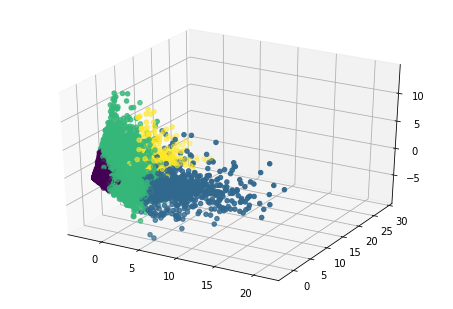

In [27]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z,c=labels)
pyplot.show()